# Hiv(Non-Aids) Cases
- This is a dataset that contain all the county with reported cases on having Hiv Non-Aids.
- The Hiv Non-Aids has 3 columns 1st is the county, 2nd is HIV (NON-AIDS) CASES LIVING AS OF 2/28/2023, 3rd AIDS CASES LIVING AS OF  2/28/2023
- This dataset is based on helping identify the Non-Aids and Aids individuals and show how many are on a certail county
- we will be using selenium to scrape the real time data for better understading and reading of the table rows and columns
- store it in a csv file for better retrival and manipulation of the data
- perform Extrapolatory Data Analysis to get better insight, correalation.
- plot some visualization for better storytelling and better undestanding of the data

In [1]:
# importing packages
import csv
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait
from selenium.common import NoSuchElementException
plt.style.use('ggplot')
import plotly.express as px
import plotly.graph_objects as go

In [12]:
# using selenium to extract the data realtime
driver = webdriver.Chrome()
driver.maximize_window
driver.get(
    url="https://dph.illinois.gov/topics-services/diseases-and-conditions/hiv-aids/hiv-surveillance/update-reports/2023/february.html")

# Waiting for the Table to load
TableWait = WebDriverWait(driver, 10)
table = TableWait.until(EC.presence_of_element_located((By.XPATH, "//table[@id='DataTables_Table_11']")))

# getting how many details are on the data
Tabledata = driver.find_element(By.CSS_SELECTOR, "#DataTables_Table_11_info").text
start_Text = Tabledata.find("of") + 3
last_Text = Tabledata.find("entries") -1
No_entries = int(Tabledata[start_Text:last_Text].strip())
print(f"Total number of entries: {(No_entries)}")

data = []
for No_entries in range(1, No_entries +1):
    try:
        table = TableWait.until(EC.presence_of_element_located((By.XPATH, "//table[@id='DataTables_Table_11']")))

        # finding the elements on the data
        datarow = table.find_elements(By.XPATH, ".//tbody/tr")
        for _ in datarow:
            cells = _.find_elements(By.XPATH, ".//td")
            row = [cell.text for cell in cells]
            data.append(row)


        # checking if the last entry on the table is Illinois
        if any('Illinois' in datarow for datarow in data):
            break

        # next button click
        next_button = driver.find_element(By.ID, "DataTables_Table_11_next")
        if "disabled" in next_button.get_attribute('class'):
            break
        next_button.click()

        time.sleep(10)
        
    except NoSuchElementException as e:
        print(f"Error: {e}")
        break

print()
for row in data:
    print(row)

# writing the file to csv format
with open('Hiv(Non)AidsCases.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    if data:
        writer.writerow(['County', 'HIV (NON-AIDS) CASES LIVING AS OF 2/28/2023', 'AIDS CASES LIVING'])
    writer.writerows(data)

print()
print('Data saved Successfully on the csv format')
    
time.sleep(5)
driver.quit()

Total number of entries: 104

['Adams', '26', '29']
['Alexander', '15', '9']
['Bond', '7', '12']
['Boone', '22', '16']
['Brown', '14', '17']
['Bureau', '12', '5']
['Calhoun', '3', '0']
['Carroll', '1', '3']
['Cass', '10', '2']
['Champaign', '256', '207']
['Christian', '17', '17']
['Clark', '2', '7']
['Clay', '5', '3']
['Clinton', '22', '31']
['Coles', '26', '22']
['Cook', '16000', '14277']
['Crawford', '23', '19']
['Cumberland', '3', '2']
['DeKalb', '75', '47']
['De Witt', '4', '5']
['Douglas', '1', '1']
['DuPage', '572', '440']
['Edgar', '4', '6']
['Edwards', '1', '3']
['Effingham', '3', '10']
['Fayette', '24', '28']
['Ford', '2', '3']
['Franklin', '12', '23']
['Fulton', '26', '25']
['Gallatin', '3', '2']
['Greene', '2', '3']
['Grundy', '15', '12']
['Hamilton', '1', '4']
['Hancock', '0', '2']
['Hardin', '2', '2']
['Henderson', '1', '0']
['Henry', '13', '24']
['Iroquois', '3', '9']
['Jackson', '57', '40']
['Jasper', '1', '3']
['Jefferson', '30', '18']
['Jersey', '8', '3']
['Jo Daviess'

# Table 2 
## Health Departments that contain high cases on Hiv(Non-Aids) and Aids Cases
- Extracting data from Health Department table that has:
  1. Health Department
  2. Hiv(Non-Aids)
  3. Aids Cases
- using selenium we will extract all the content from the table and save it to a csv format

In [11]:
browser = webdriver.Chrome()
browser.fullscreen_window
browser.get(
    url="https://dph.illinois.gov/topics-services/diseases-and-conditions/hiv-aids/hiv-surveillance/update-reports/2023/february.html")
TableHealth = browser.find_element(By.XPATH, "//table[@id='DataTables_Table_4']")
RowHealth = TableHealth.find_elements(By.XPATH, ".//tbody/tr")
RowCount = len(RowHealth)
print(f"No of rows: {RowCount}")

data = []
for _ in RowHealth:
    cell = _.find_elements(By.XPATH, ".//td")
    row = [cells.text for cells in cell]
    data.append(row)

print()
for row in data:
    print(row)

# writting file to csv format
with open('Heath Deaprtment Hiv(Non-Aids).csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    if data:
        writer.writerow(['Heath Department', 'HIV (NON-AIDS) CASES LIVING AS OF 2/28/2023', 'AIDS CASES LIVING'])
    writer.writerows(data)
print()
print('Data saved successfully')
time.sleep(10)
browser.quit()

No of rows: 5

['Chicago Health Dept.', '13071', '11396']
['Cook Co. Health Dept.', '2677', '2579']
['Evanston Health Dept.', '116', '135']
['Oak Park Health Dept.', '99', '121']
['Skokie Health Dept.', '37', '46']

Data saved successfully


# Table 3
## St.Clair County Breakdown
- A table containing St.Clair County Breakdown Health department that has the highest cases on Both Hiv(Non-Aids) and Aids Cases
- using selenium we extract the data real time and save the data in a csv format 

In [ ]:
browser = webdriver.Chrome()
browser.maximize_window
browser.get(
    url="https://dph.illinois.gov/topics-services/diseases-and-conditions/hiv-aids/hiv-surveillance/update-reports/2023/february.html")
TableBreakdown = browser.find_element(By.XPATH, "//table[@id='DataTables_Table_5']")
TableRowBreakdown = TableBreakdown.find_elements(By.XPATH, ".//tbody/tr")
RowBreakdown = len(TableRowBreakdown)
print(f"No of Rows: {RowBreakdown}")
print()

data = []
for _ in TableRowBreakdown:
    cell = _.find_elements(By.XPATH, ".//td")
    row = [cells.text for cells in cell]
    data.append(row)

for row in data:
    print(row)

# writting the file to csv format
with open('St Clair County Breakdown.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    if data:
        writer.writerow(['HEALTH DEPARTMENT', 'HIV (NON-AIDS) CASES LIVING AS OF 2/28/2023', 'AIDS CASES LIVING AS OF 2/28/2023'])
    writer.writerows(data)

print()
print('Data Saved successfully')

time.sleep(15)
browser.quit()

# Extrapolatory Data Analysis
- finding hidden details
- checking correlation between numerical values

In [ ]:
# Hiv (Non-Aids) and Aids Cases

In [13]:
df = pd.read_csv('Hiv(Non)AidsCases.csv')
df1_copy = df.copy()

In [14]:
df1_copy

,County,HIV (NON-AIDS) CASES LIVING AS OF 2/28/2023,AIDS CASES LIVING
0,Adams,26,29
1,Alexander,15,9
2,Bond,7,12
3,Boone,22,16
4,Brown,14,17
...,...,...,...
99,Williamson,40,21
100,Winnebago,275,255
101,Woodford,9,5
102,Unknown,1,2


In [15]:
# renaming columns
df1_copy.rename(
    columns = {"AIDS CASES LIVING AS OF 2/28/2023": "Aids Cases Living",
              "HIV (NON-AIDS) CASES LIVING AS OF 2/28/2023": "Hiv (Non-Aids) Cases Living"}, 
                inplace=True)

In [16]:
df1_copy

,County,Hiv (Non-Aids) Cases Living,AIDS CASES LIVING
0,Adams,26,29
1,Alexander,15,9
2,Bond,7,12
3,Boone,22,16
4,Brown,14,17
...,...,...,...
99,Williamson,40,21
100,Winnebago,275,255
101,Woodford,9,5
102,Unknown,1,2


In [63]:
pd.set_option('display.max_row', None)

In [18]:
# number of columns
row, column = df1_copy.shape
print(f'Rows: {row} columns: {column}')

Rows: 104 columns: 3


In [19]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   County                       104 non-null    object
 1   Hiv (Non-Aids) Cases Living  104 non-null    int64 
 2   AIDS CASES LIVING            104 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


In [20]:
df1_copy.describe()

,Hiv (Non-Aids) Cases Living,AIDS CASES LIVING
count,104.000000,104.000000
mean,412.384615,363.278846
std,2606.834946,2306.742491
min,0.000000,0.000000
25%,3.000000,3.000000
50%,12.000000,12.000000
75%,34.000000,32.500000
max,21447.000000,18891.000000


In [21]:
# checking for null values
df1_copy.isna().sum()

County                         0
Hiv (Non-Aids) Cases Living    0
AIDS CASES LIVING              0
dtype: int64

In [22]:
# checking for duplicates
df1_copy.loc[df1_copy.duplicated] 

,County,Hiv (Non-Aids) Cases Living,AIDS CASES LIVING


In [25]:
# chacking total number of 
df1_copy['County'].value_counts()

County
Adams         1
Alexander     1
Bond          1
Boone         1
Brown         1
             ..
Williamson    1
Winnebago     1
Woodford      1
Unknown       1
Illinois      1
Name: count, Length: 104, dtype: int64

In [24]:
pd.reset_option('display.max_rows', None)

In [26]:
# heatmap to show the correlation on the numerical values
corr = df1_copy[df1_copy.columns[1:]].corr()

In [27]:
corr

,Hiv (Non-Aids) Cases Living,AIDS CASES LIVING
Hiv (Non-Aids) Cases Living,1.000000,0.999961
AIDS CASES LIVING,0.999961,1.000000


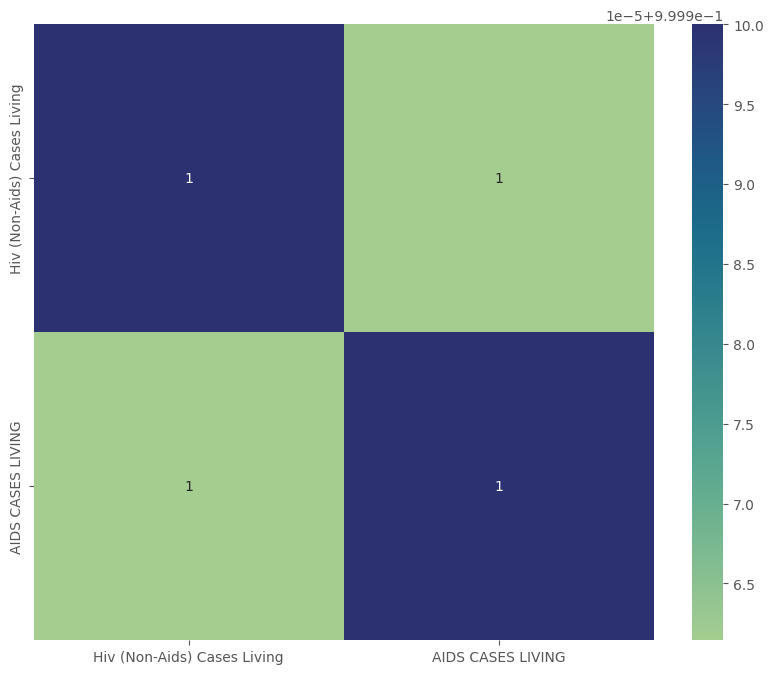

In [28]:
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='crest')
plt.show()

In [93]:
group = df1_copy.groupby('County')[["AIDS CASES LIVING","Hiv (Non-Aids) Cases Living"]].mean()

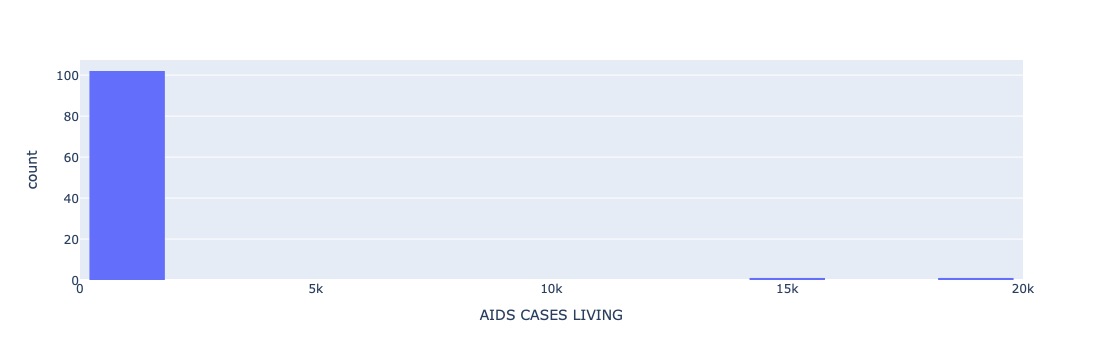

In [94]:
# histogram plot for the mean data
fig = px.histogram(group, x = "AIDS CASES LIVING", nbins=10)
fig.update_layout(bargap=0.2)
fig.show()

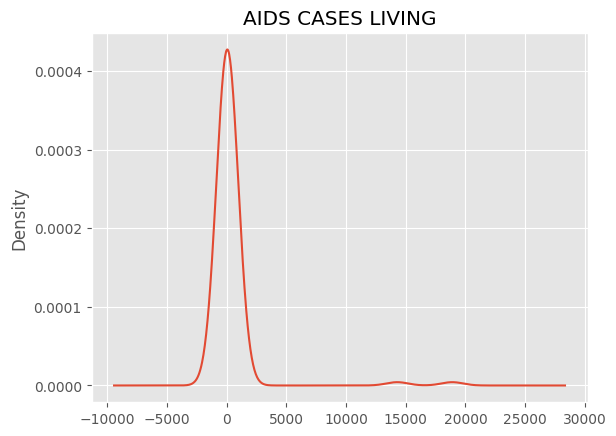

In [95]:
# distribution plot
fig = group['AIDS CASES LIVING'].plot(kind='kde', title="AIDS CASES LIVING")
plt.show()

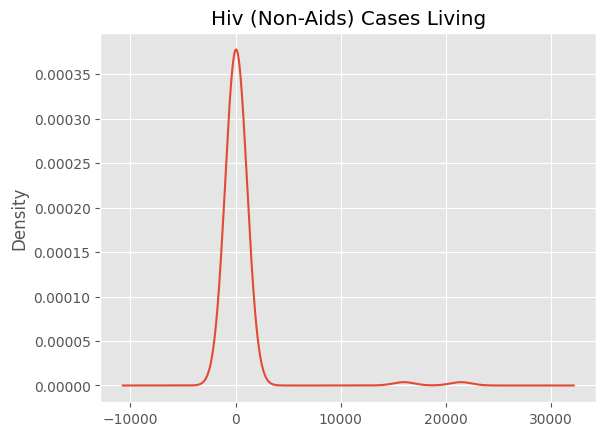

In [96]:
fig = group['Hiv (Non-Aids) Cases Living'].plot(kind='kde', title="Hiv (Non-Aids) Cases Living")
plt.show()

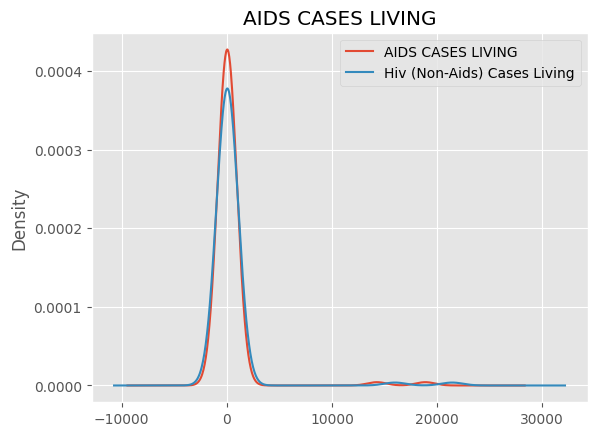

In [97]:
# Both columns
fig = group.plot(kind='kde', title="AIDS CASES LIVING")
plt.show()

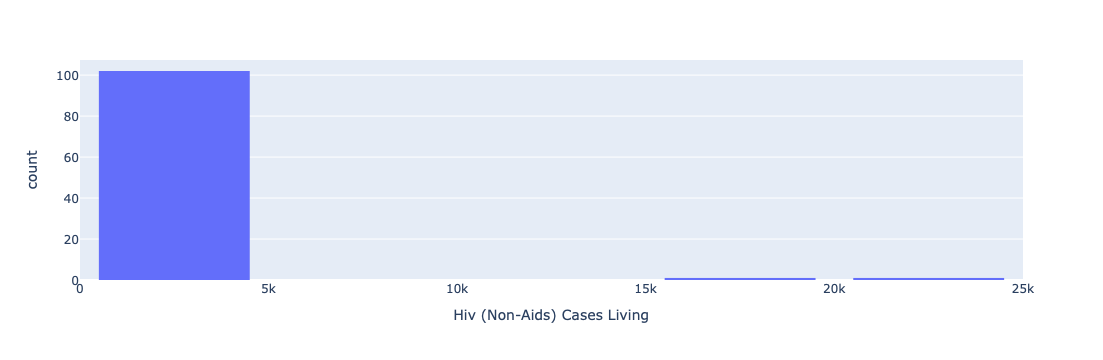

In [98]:
# Histogram for Hiv (Non-Aids) Cases
fig = px.histogram(group, x ="Hiv (Non-Aids) Cases Living",nbins=10)
fig.update_layout(bargap=0.2)
fig.show()

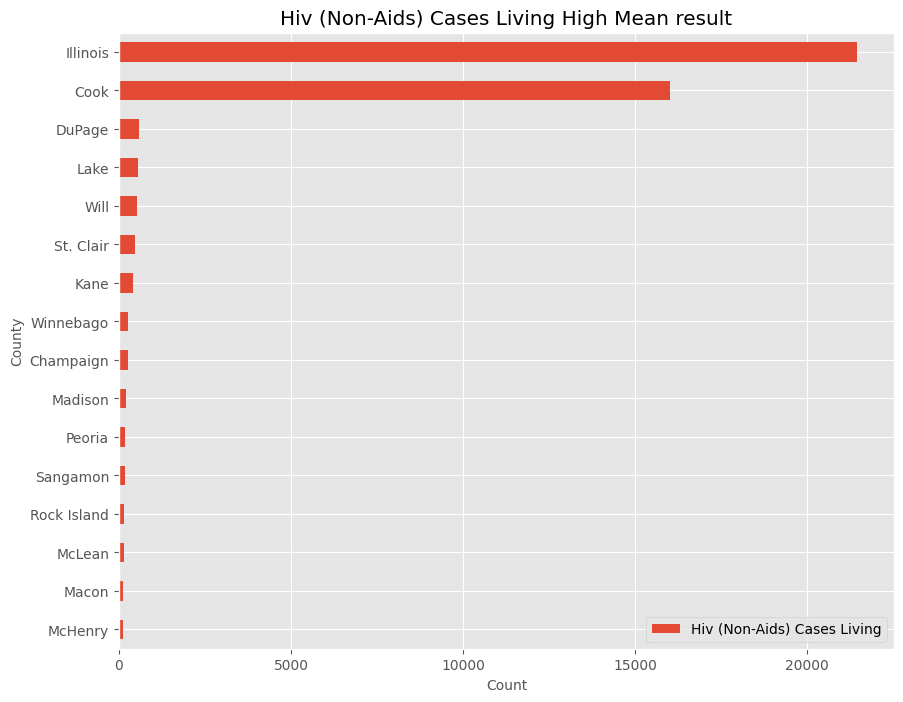

In [108]:
# getting the highest mean values of a county
Hiv_High_Mean_Cases = group.loc[group['Hiv (Non-Aids) Cases Living'] > 100,['Hiv (Non-Aids) Cases Living']]
# plotting a bar graph for the dataframe Hiv_High_mean_cases
Hiv_High_Mean_Cases.sort_values(by='Hiv (Non-Aids) Cases Living',inplace=True)
fig = Hiv_High_Mean_Cases.plot(kind='barh', figsize=(10, 8),title = 'Hiv (Non-Aids) Cases Living High Mean result')
fig.tick_params(axis='y', labelsize=10)
fig.tick_params(axis='x', labelsize=10)
fig.set_ylabel('County', fontsize=10)
fig.set_xlabel('Count', fontsize=10)
fig.legend(loc="lower right")

In [67]:
group

,AIDS CASES LIVING,Hiv (Non-Aids) Cases Living
County,,
Illinois,18891.0,21447.0
Cook,14277.0,16000.0
DuPage,440.0,572.0
Lake,461.0,541.0
Will,385.0,528.0
St. Clair,378.0,473.0
Kane,361.0,419.0
Winnebago,255.0,275.0
Champaign,207.0,256.0


In [ ]:
df1_copy.to_csv('')